# __빅데이터개론 기말프로젝트__

* InClass Prediction Competition 주소 :
  https://www.kaggle.com/t/b0dad38443624414a46ce6df520a26bc


1. 기간 : 2020년 11월 30일[월요일] ~ 12월 16일[수요일] - 기간 외 제출 받지않음.
2. 개인 프로젝트(팀별 프로젝트 아님!!) - copy & paste 발견시 0점 처리
3. 주어진 데이터에 대한 분류 모델 생성 및 성능평가(kaggle submissions)
  * Logistic Regression, Decision Trees, Random Forests, Support Vector Machine
  * 4개의 분류 모델을 사용하여 Train set으로 학습, Test set으로 예측/분류를 진행하여 Kaggle에 submissions
  * 4개의 분류 모델을 모두 사용해야 하며, 자신이 작업했던 내용을 Jupyter notebook(Jupyter, Google Colab) 또는 Rcript에 저장할 것.
  * 또한, 모든 작업을 진행할 때는 필요한 부분에 주석을 반드시 작성할 것*(주석 미기입시 0점 처리)*

```
# Random Forest 또는 SVM predict에서 에러가 발생할 때 아래의 코드 사용
# https://stackoverflow.com/questions/24829674/r-random-forest-error-type-of-predictors-in-new-data-do-not-match
common <- intersect(names(train), names(test)) 
for (p in common) { 
  if (class(train[[p]]) == "factor") { 
    levels(test[[p]]) <- levels(train[[p]]) 
  } 
}
```


# <b>패키지 설치

In [2]:
#패키지 설치
install.packages(c("tidyverse", "data.table", "devtools", "scatterplot3d", "plotly","PerformanceAnalytics","caret","e1071"))
install.packages(c("rattle", "rpart.plot"))
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(tidyverse)
library(data.table)
library(devtools)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [435]:
#파일 불러옴
bank_DF <- fread("./Train.csv") %>% as_tibble()
bank_p<- fread("./Test.csv")%>% as_tibble()

# 데이터 구조 확인

In [436]:
#데이터 구조 확인
bank_DF %>% str()
bank_DF%>% summary()
bank_DF<-na.omit(bank_DF)  #결측값 제거
bank_DF$age %>% unique()
bank_DF$job%>%unique()
bank_DF$marital%>%unique()
bank_DF$education%>%unique()
bank_DF$default%>%unique()
bank_DF$housing%>%unique()
bank_DF$loan%>%unique()
bank_DF$contact%>%unique()
bank_DF$month%>%unique()
bank_DF$day_of_week%>%unique()
bank_DF$duration%>%unique()
bank_DF$campaign%>%unique()
bank_DF$pdays%>%unique()
bank_DF$previous%>%unique()
bank_DF$poutcome%>%unique()
bank_DF$emp.var.rate%>%unique()
bank_DF$cons.price.idx%>%unique()
bank_DF$cons.conf.idx%>%unique()
bank_DF$euribor3m%>%unique()
bank_DF$nr.employed%>%unique()
bank_DF$termDeposit%>%unique()


tibble [10,098 × 22] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ default       : chr [1:10098] "no" "no" "unknown" "no" ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays         : int [1:10098] 999 999 

      ID                 age           job              marital         
 Length:10098       Min.   :17.0   Length:10098       Length:10098      
 Class :character   1st Qu.:32.0   Class :character   Class :character  
 Mode  :character   Median :38.0   Mode  :character   Mode  :character  
                    Mean   :40.3                                        
                    3rd Qu.:48.0                                        
                    Max.   :98.0                                        
  education           default            housing              loan          
 Length:10098       Length:10098       Length:10098       Length:10098      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

[1] 41 57 34 54 49 73 40 56 46 37 26 55 33 28 31 23 43 52 27 64 53 48 30 38 35
[26] 50 98 36 47 42 20 60 32 39 58 24 77 25 22 44 29 80 71 51 74 82 59 45 66 63
[51] 68 72 21 65 69 88 70 62 76 78 75 79 81 67 83 61 19 85 18 84 86 17 89 92 87

[1] "technician"    "retired"       "management"    "blue-collar"  
 [5] "entrepreneur"  "admin."        "self-employed" "services"     
 [9] "unemployed"    "student"       "housemaid"     "unknown"

[1] "single"   "married"  "divorced" "unknown"

[1] "university.degree"   "high.school"         "professional.course"
[4] "basic.4y"            "unknown"             "basic.9y"           
[7] "basic.6y"            "illiterate"

[1] "no"      "unknown" "yes"

[1] "no"      "yes"     "unknown"

[1] "no"      "unknown" "yes"

[1] "cellular"  "telephone"

[1] "nov" "jun" "jul" "may" "mar" "apr" "aug" "dec" "oct" "sep"

[1] "fri" "wed" "mon" "thu" "tue"

[1]  903   74   75   59  252  659   21 2462  266  205  383  518  200  527
  [15]  895  201  328  715  758  107   66   90  166  268 1212  184  213  494
  [29]  134   95 1013  253  196  421  239  156  331 1186  153   70  179  405
  [43]  118  293  345  249  476  120  343  211  450   52  302  744  175  700
  [57]  124  139  160  260  163  202    8  545  131  167   79   20  195  226
  [71]  181  140  209  147 1156   51  612  313  187  165  791  452  241  109
  [85]  231  320  392  217  570   69  214  206 1514  126  597  274 1020  194
  [99]  190  422  257  172   54  161  701  478  133  976  444 1207 1422   77
 [113]   57  169  180  192   88  315   13  146  102  522   85  216  856  125
 [127]   87  896 1008  560  312  219  360  429 1152  208  687  555  753  159
 [141]  116  654   44  349  220  222  106  495   96  341   55  317  259   98
 [155]   89  507   42  111  367  965  332  364  154  183  128  709   84  809
 [169]  742  189  294  145  262 1193   99   97  692  414  797  901  330  198
 [183]  115   92  504  532  304  144  324  305  766  273  394  767  105  554
 [197]  407  519  673  135  327  812  122  466  277   82  101   80  281   49
 [211]  363  269   16 1332  275  698 1151  420  769  720  223  594  296  136
 [225]  297  164  173  188  533  458  270  339  251  158  384   63   68  157
 [239]  171  229  454   26  400  571  142  141  356  335  646 4199  248  453
 [253]  379 1232   81  329  306  676  544    7  221  112  512  432  177   94
 [267]   19  537  233  303   62 1109  291  417   11   91  910  240 1176 1129
 [281]   31  397  547  123  852 1441  536   22  127  113  263  264   30  714
 [295] 1049  409  386  228  669 1088  347  487  238 1777  578  861  235 1017
 [309]  342   14 2260 1076  100  152  114  316  658  362  265  620  182  391
 [323]  103  110  178  358 1416  250   86  582 1360  862  731  149  137 1412
 [337]  863  435   73  550  530  716 1321  117  288  280  298  292  543  191
 [351]  768  261   83  130  777  282  232  739   17  434  406  210  680  514
 [365]  671  814  890  510  838  798  788  373  464   24  686  278   41  245
 [379]  541  446  148  151  618  587 1000   53  408  503  244  481  636  558
 [393] 1018  562  517  311   28  482  138   50  846   93  186  457 1077  225
 [407]  322  419  725   64 1096  401   34  607 1090  817  354  880  780  601
 [421]  705   43  574  946  600  738 1099  556  242  256  230  197  860   78
 [435]  483  426  470  617  390  662   29 1241   33  388  493  370  704  375
 [449] 1294  815  355  486  337  819   37   61  308   67  941  108  535  119
 [463]  129   76  539   23  471  283  143  670 1342  952  811   72  756  333
 [477]  473  207  732  365  442  635  885  733 1804 2372   38  474  867  199
 [491]  212  969  162  267  684  300  542  437 1002  378  309  424   56 1269
 [505]  369  801  227 1365   35  334  215  155  827  413  586  344  615  132
 [519]  592  425  534 1106 1063  326  718  580  605  479 1373  894  462   15
 [533]  859  285  772 1282  467  299  992  695  505  633  318  590   10  389
 [547]  538  321   71   48  472  290 1397  707  584  608  387  924  651  411
 [561]  301  121 1224  830  336 1214  359  224  438  548  295  966  656  193
 [575] 1007  829  893  888  923  763  416  150  185  480  423  706  243  176
 [589]  783  168  968  897 1721  613  726  668  934   45  849  325  237  499
 [603]  685  524 1399  850   36  104  789 1100  289 1730   65  551  988  448
 [617]  445 1089  276  361   39 1392  374  891  595  734  368  696  623 1003
 [631]  485 1187  314  475  627  920  552 1543  371  500  340  502  619  667
 [645]  236  272 1336  583  436 1120  795  399  983  204   32 1306  346  520
 [659]  258  621  385  565 1169   18  396 1262  564  593  994  492  234  254
 [673] 1117  380  569  431  348 1272 1340  935  771  489   60 1130 1246  799
 [687]  855  449  625  174  284 1173  974  884  271   25  666  804  395  561
 [701]  170  218  939  531 1234  506 1112  761  557  352  459   12  712  553
 [715] 3631   40 1014  727  882  864  937  721  463  501  691  246 1532  588

[1]  3  5  1  2  7  6  4 13  9 19 20 16  8 14 23 22 17 10 12 33 11 30 15 28 21
[26] 24 41 25 29 31 42 35 26 27

[1] 999   6   2   4   3  12   1  13   5   9  14  16   7  10   0  11   8  26  15
[20]  21  17  22  27  18  25  19  20

[1] 1 0 2 4 3 5 6

[1] "failure"     "nonexistent" "success"

[1] -0.1  1.4  1.1 -1.8 -1.1 -1.7 -3.4 -3.0 -2.9 -0.2

[1] 93.200 94.465 93.918 93.994 93.369 93.075 94.767 92.893 94.027 93.444
[11] 94.215 92.649 92.713 92.963 94.601 92.431 93.876 94.055 92.201 93.749
[21] 92.469 94.199 92.379 92.843 93.798 92.756

[1] -42.0 -41.8 -42.7 -36.4 -34.8 -47.1 -50.8 -46.2 -38.3 -36.1 -40.3 -30.1
[13] -33.0 -40.8 -49.5 -26.9 -40.0 -39.8 -31.4 -34.6 -33.6 -37.5 -29.8 -50.0
[25] -40.4 -45.9

[1] 4.021 4.959 4.963 4.191 4.857 0.652 4.865 1.365 1.028 4.076 1.281 1.291
 [13] 1.327 0.899 1.266 1.299 1.423 4.860 4.120 4.968 0.846 4.960 0.715 4.957
 [25] 4.961 1.270 1.405 0.720 4.970 4.856 4.855 4.962 1.032 1.313 0.730 0.677
 [37] 1.260 0.711 0.829 4.958 1.041 4.967 0.697 4.864 1.410 4.153 0.644 4.966
 [49] 4.965 4.964 0.740 0.699 4.859 0.653 1.072 0.739 0.881 0.706 0.737 1.466
 [61] 0.883 1.029 0.900 4.955 0.636 0.716 0.803 0.750 1.344 1.757 1.262 0.638
 [73] 1.044 0.742 0.834 0.752 1.000 0.884 0.643 1.334 1.250 1.354 1.268 0.838
 [85] 0.722 1.435 0.635 0.896 0.793 0.692 0.843 4.936 0.645 0.655 0.879 0.972
 [97] 1.037 0.637 0.744 1.244 0.649 1.663 1.629 0.723 4.733 0.904 0.861 1.031
[109] 4.858 0.770 4.866 1.498 0.754 1.483 0.728 0.886 0.767 4.947 0.797 0.704
[121] 1.531 0.873 0.781 1.050 1.479 1.445 1.016 0.672 0.717 0.646 0.714 0.790
[133] 0.768 0.788 0.702 0.849 1.259 0.822 0.755 1.560 0.778 1.039 1.520 0.835
[145] 0.642 1.538 1.049 0.944 1.453 1.099 1.264 0.982 0.741 0.683 0.713 0.659
[157] 1.224 4.343 0.889 0.640 0.773 0.668 0.654 0.869 1.046 0.903 0.959 0.733
[169] 0.827 1.811 1.206 1.406 4.760 0.743 0.639 5.000 0.695 1.640 1.726 0.727
[181] 0.880 1.415 1.584 0.663 0.821 0.707 0.810 0.729 0.712 4.956 1.687 1.799
[193] 1.048 1.372 4.406 0.708 1.556 0.709 0.878 0.905 1.025 0.813 0.735 0.996
[205] 0.876 1.059 0.748 4.918 0.682 0.782 1.548 0.761 1.392 1.215 1.602 0.987
[217] 0.885 0.684 0.819 0.840 0.688 0.898 4.827 0.854 1.040 1.018 1.286 0.870
[229] 4.245 0.882 0.685 4.663 1.400 0.851 0.859 0.634 4.700 0.719 0.877 1.614
[241] 0.771 1.043 0.651 4.592 0.993 0.893 0.701 4.794 0.809 1.650 0.802 0.908
[253] 0.762 1.252 0.710 4.912 0.977 0.942 1.510 0.825 1.008 1.703 1.235 1.384
[265] 5.045 0.894 1.035 1.007 0.718 0.721 1.085 0.766 0.732 0.700 0.724 0.650
[277] 0.985 4.286 1.778 4.921 0.731 0.895 3.816 0.690 0.921 0.965 4.223 0.891
[289] 0.753 3.053 1.047 4.474 0.933 0.888 0.749 0.914

[1] 5195.8 5228.1 5191.0 5008.7 5099.1 4963.6 4991.6 5017.5 5023.5 5076.2
[11] 5176.3

[1] "no"  "yes"

**전처리 과정**

In [437]:
bank_DF<-bank_DF %>% select(-ID, -housing, -pdays, -emp.var.rate,-default, -euribor3m) #ID 및 다른 불필요한 데이터 제거

In [438]:
#데이터 확인 및 분포도 검사
bank_DF %>%str()
table(bank_DF$age) 

tibble [10,098 × 16] (S3: tbl_df/tbl/data.frame)
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ previous      : int [1:10098] 1 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : chr [1:10098] "failure" "nonexistent" "nonexistent" "nonexistent" ...
 $ cons.price.idx: num [1:10098] 93.2 94.5 93.9 93.2 94 ...
 $ cons.conf


 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36 
  2  13  22  28  35  47  74 133 153 193 227 295 389 426 481 411 455 437 439 380 
 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56 
348 345 325 248 275 249 226 211 239 225 197 244 173 193 162 200 174 149 144 175 
 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76 
137 141 128  97  33  28  21  34  24  27  14  16  16  21  24  18  15  17  13  21 
 77  78  79  80  81  82  83  84  85  86  87  88  89  92  98 
 12  15   9  18   8  12   6   2   7   6   1   9   2   3   1 

In [439]:
#분포도 검사
table(bank_DF$age)
table(bank_DF$day_of_week)
table(bank_DF$contact)
table(bank_DF$previous)
table(bank_DF$loan)
table(bank_DF$pdays)


 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36 
  2  13  22  28  35  47  74 133 153 193 227 295 389 426 481 411 455 437 439 380 
 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56 
348 345 325 248 275 249 226 211 239 225 197 244 173 193 162 200 174 149 144 175 
 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76 
137 141 128  97  33  28  21  34  24  27  14  16  16  21  24  18  15  17  13  21 
 77  78  79  80  81  82  83  84  85  86  87  88  89  92  98 
 12  15   9  18   8  12   6   2   7   6   1   9   2   3   1 


 fri  mon  thu  tue  wed 
1919 2026 2115 1978 2060 


 cellular telephone 
     7083      3015 


   0    1    2    3    4    5    6 
8104 1429  373  134   42   12    4 


     no unknown     yes 
   8326     252    1520 

Warning message:
“Unknown or uninitialised column: `pdays`.”


< table of extent 0 >

In [440]:
bank_DF<-bank_DF %>% mutate_at('.vars'=c("age","job","marital","education","loan","day_of_week","contact","month","previous","poutcome"),'.funs'=as.factor) #mutate_at을 통해 범주 선정

In [441]:
bank_DF<- bank_DF %>% mutate(termDeposit = factor(if_else(termDeposit == "yes", 1, 0), levels = c("0", "1"))) #yes 일 시 1, 아닐 시 0으로 바꿔줌.

In [442]:
bank_DF %>% str()

tibble [10,098 × 16] (S3: tbl_df/tbl/data.frame)
 $ age           : Factor w/ 75 levels "17","18","19",..: 25 41 18 38 33 57 24 18 40 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ previous      : Factor w/ 7 levels "0","1","2","3",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ poutcome      : Factor w/ 3 levels "fai

In [443]:
set.seed(31)# seed값 설정

In [444]:
index <- createDataPartition(y = bank_DF$termDeposit, p = 0.7, list = FALSE) #데이터 70%, 30%으로 나눠줌

In [445]:
head(index, 30) 
train <- bank_DF[index, ] #train과 test 값 설정
test <- bank_DF[-index, ]


Resample1
1
2
3
4
6
7
8
10
11
12


In [446]:
train #train 값 확인

age,job,marital,education,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,termDeposit
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
41,technician,single,university.degree,no,cellular,nov,fri,903,3,1,failure,93.200,-42.0,5195.8,0
57,retired,single,high.school,no,telephone,jun,fri,74,3,0,nonexistent,94.465,-41.8,5228.1,0
34,technician,married,professional.course,no,cellular,jul,wed,75,5,0,nonexistent,93.918,-42.7,5228.1,0
54,management,married,university.degree,no,cellular,nov,mon,59,1,0,nonexistent,93.200,-42.0,5195.8,0
73,retired,married,unknown,no,telephone,mar,mon,659,1,0,nonexistent,93.369,-34.8,5008.7,1
40,technician,married,professional.course,no,telephone,jun,mon,21,1,0,nonexistent,94.465,-41.8,5228.1,0
34,entrepreneur,married,university.degree,no,cellular,nov,mon,2462,2,0,nonexistent,93.200,-42.0,5195.8,1
41,management,married,university.degree,no,telephone,may,wed,205,7,0,nonexistent,93.994,-36.4,5191.0,0
46,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,0,nonexistent,94.767,-50.8,4963.6,0


## 1. **Logistic Regression**

In [447]:
m <- glm(termDeposit ~ . ,data=train, family = "binomial") #모델 생성

In [448]:
m2 <- step(m, direction = "backward") #backward 사용

Start:  AIC=4906.48
termDeposit ~ age + job + marital + education + loan + contact + 
    month + day_of_week + duration + campaign + previous + poutcome + 
    cons.price.idx + cons.conf.idx + nr.employed



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                 Df Deviance    AIC
- age            73   4733.9 4833.9
- job            11   4672.1 4896.1
- previous        5   4664.7 4900.7
- marital         3   4662.0 4902.0
- day_of_week     4   4665.9 4903.9
- contact         1   4660.8 4904.8
- cons.conf.idx   1   4661.0 4905.0
- education       7   4673.0 4905.0
<none>                4660.5 4906.5
- loan            2   4664.6 4906.6
- campaign        1   4670.4 4914.4
- cons.price.idx  1   4691.6 4935.6
- poutcome        1   4772.8 5016.8
- month           9   4943.4 5171.4
- nr.employed     1   5198.9 5442.9
- duration        1   7327.9 7571.9

Step:  AIC=4833.94
termDeposit ~ job + marital + education + loan + contact + month + 
    day_of_week + duration + campaign + previous + poutcome + 
    cons.price.idx + cons.conf.idx + nr.employed

                 Df Deviance    AIC
- previous        5   4737.9 4827.9
- marital         3   4735.6 4829.6
- education       7   4744.9 4830.9
- day_of_week     4   4739.7 4831.7
- cons.

In [449]:
summary(m2) # 모델 확인


Call:
glm(formula = termDeposit ~ job + month + duration + campaign + 
    poutcome + cons.price.idx + nr.employed, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.9448  -0.4122  -0.2175   0.4633   2.8127  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          1.251e+02  6.732e+00  18.584  < 2e-16 ***
jobblue-collar      -4.618e-01  1.150e-01  -4.015 5.94e-05 ***
jobentrepreneur     -3.973e-01  2.188e-01  -1.816 0.069351 .  
jobhousemaid        -3.278e-01  2.694e-01  -1.217 0.223664    
jobmanagement       -1.128e-01  1.515e-01  -0.744 0.456581    
jobretired           1.575e-01  1.604e-01   0.982 0.325900    
jobself-employed    -3.438e-01  2.037e-01  -1.688 0.091412 .  
jobservices         -5.732e-01  1.497e-01  -3.829 0.000129 ***
jobstudent           5.734e-02  1.929e-01   0.297 0.766265    
jobtechnician       -1.335e-01  1.173e-01  -1.139 0.254736    
jobunemployed       -

In [450]:
#모델 데이터 예측
predict_value <- predict(m2, test, type = "response") %>% tibble(predict_value = .)
predict_check <- test %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value)
predict_check%>%show()

# A tibble: 3,028 x 2
   termDeposit predict_value
   <fct>               <dbl>
 1 0                  0.0313
 2 1                  0.426 
 3 1                  0.864 
 4 0                  0.851 
 5 1                  0.184 
 6 1                  0.335 
 7 0                  0.0406
 8 0                  0.835 
 9 0                  0.0641
10 1                  0.771 
# … with 3,018 more rows


In [451]:
#roc 사용
library("pROC")
roc <- roc(predict_check$termDeposit, predict_check$predict_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [452]:
#threshhold 값 구하기
pROC::coords(roc, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.255242


In [453]:
bank_p2<-bank_p%>%select(-ID, -housing, -pdays, -emp.var.rate,-default, -euribor3m)
#위와 마찬가지로 범주형 데이터로  변경
test_kaggle<-bank_p2%>%mutate_at('.vars'=c("age","job","marital","education","loan","day_of_week","contact","month","previous","poutcome"),'.funs'=as.factor)

In [458]:
predict_value <- predict(m2, test_kaggle, type="response") %>% tibble(termDeposit =.) #thresh hold 값을 통해 데이터 예측
predict_cutoff <- bank_p %>% select(ID) %>% dplyr::bind_cols(.,predict_value)%>%mutate(termDeposit = ifelse(termDeposit >= 0.255242, 1, 0))

In [459]:
predict_cutoff <-predict_cutoff %>% mutate(termDeposit = factor(if_else(termDeposit == "1", "yes", "no"), levels = c("yes", "no"))) #1과 0을 다시 yes 와 no로 변경
predict_cutoff %>% write_csv(path="logistic_20165324.csv")  #파일 쓰기

## 2. **Decision Trees[Bagging]**

**데이터 읽기**

In [241]:

dec <- fread("Train.csv") %>% as_tibble()
dec_predict<- fread("Test.csv")%>% as_tibble()
dec<-dec%>%select(-ID,-previous, -pdays) #ID와 previous, pdays를 제외
dec<-na.omit(dec) #결측값 제거
dec <- dec %>% mutate_at('.vars' = c("job","education","marital","education","default","loan","contact","month","day_of_week","poutcome","termDeposit"), '.funs' = as.factor)
dec %>% str() #데이터 범주화 및 형태 확인

tibble [10,098 × 19] (S3: tbl_df/tbl/data.frame)
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ poutcom

In [242]:

index <- createDataPartition(y = dec$termDeposit, p = 0.7, list = FALSE) # 데이터 70%, 30%으로 나눠줌

In [243]:
train2<-dec[index, ]
test2<-dec[-index, ] #train과 test 값 설정

**패키지 다운**

In [165]:
install.packages(c("rattle", "rpart.plot"))
library(rattle)
library(rpart.plot) #패키지 다운
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Loading required package: rpart



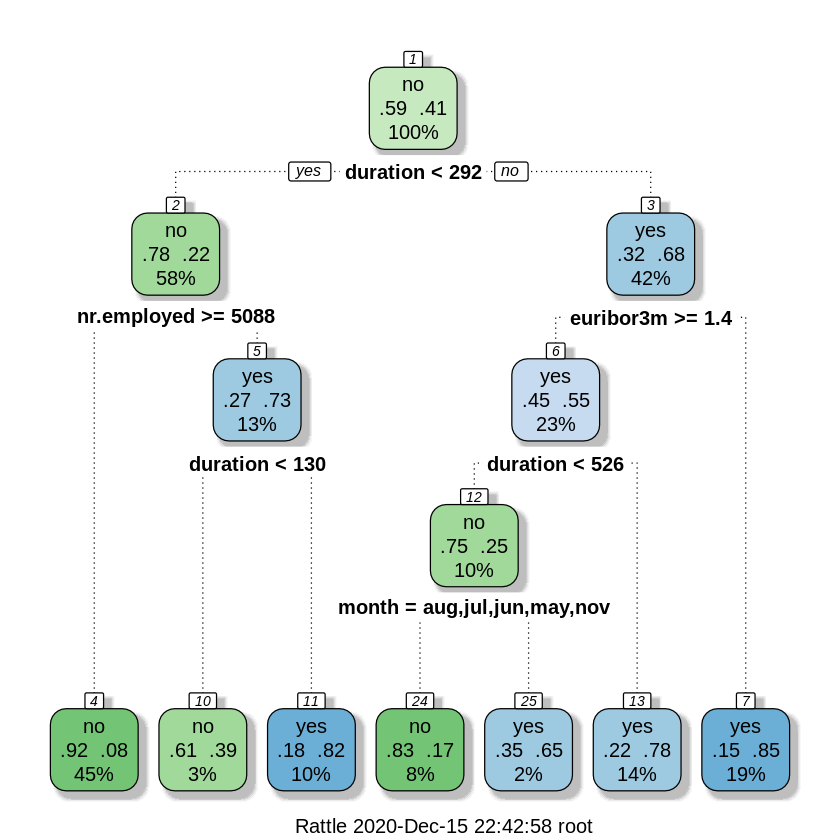

In [244]:
dec <-rpart(formula=termDeposit ~.,data=train2,method="class") #트리 모델 생성
fancyRpartPlot(dec) #트리 모델 확인

In [245]:
printcp(dec) #cp 값 확인


Classification tree:
rpart(formula = termDeposit ~ ., data = train2, method = "class")

Variables actually used in tree construction:
[1] duration    euribor3m   month       nr.employed

Root node error: 2924/7070 = 0.41358

n= 7070 

        CP nsplit rel error  xerror     xstd
1 0.371409      0   1.00000 1.00000 0.014162
2 0.140561      1   0.62859 0.63133 0.012631
3 0.058995      2   0.48803 0.48700 0.011533
4 0.014706      4   0.37004 0.37073 0.010361
5 0.011970      5   0.35534 0.36902 0.010341
6 0.010000      6   0.34337 0.35773 0.010210


In [246]:
min_xerror_cp <- dec$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)
min_xerror_cp #filter와 pull을 통해 CP 값 찾기

[1] 0.01

In [247]:
dec_predict<- dec_predict %>% select(-ID,-previous,-pdays)%>%mutate_at(c("job","education","marital","education","default","loan","contact","month","day_of_week","poutcome"),factor)
dec_predict%>%str() #테스트 데이터 범주화

tibble [1,121 × 18] (S3: tbl_df/tbl/data.frame)
 $ age           : int [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : chr [1:1121] "no" "no" "no" "no" ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : int [1:1121] 646 231 320 207 183 705 1101 236 78 61 ...
 $ campaign      : int [1:1121] 3 2 3 3 1 1 1 1 3 4 ...
 $ poutcome     

In [248]:
value <- predict(dec, dec_predict, type = "class") %>% tibble(termDeposit=.)
dec_p2<- fread("Test.csv")%>% as_tibble() #원본 파일 불러옴
test<- dec_p2
test <- test %>%select(ID) %>% dplyr::bind_cols(., value) #데이터 예측

In [249]:
test%>%write_csv("./decision_20165324.csv") #파일 쓰기

**Bagging 사용**

In [230]:
#패키지 설치
install.packages("ipred")
library(ipred)
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [257]:

bagging <- bagging(formula=termDeposit ~., data = train2, nbagg = 100)
bagging <- predict(bagging, dec_predict, type = "class") %>% tibble(termDeposit = .)
bagging <- dec_p2 %>% select(ID) %>% dplyr::bind_cols(., predict_value2)  #Bagging 데이터 예측
bagging%>%show()

# A tibble: 1,121 x 2
   ID    termDeposit
   <chr> <fct>      
 1 T1    no         
 2 T2    no         
 3 T3    no         
 4 T4    yes        
 5 T5    no         
 6 T6    yes        
 7 T7    yes        
 8 T8    no         
 9 T9    no         
10 T10   no         
# … with 1,111 more rows


In [258]:
bagging%>%write_csv("bagging_20165324.csv") #파일 쓰기

## 3. **Random Forest**

In [350]:
ran <- fread("./Train.csv") %>% as_tibble()
ran_pre <- fread("./Test.csv") %>% as_tibble() #파일 읽기
ran <- ran%>%select(-ID, -previous) #ID와 previous 값 제외

ran<-na.omit(ran) #결측값 제거

ran # 데이터 확인



age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,termDeposit
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
41,technician,single,university.degree,no,no,no,cellular,nov,fri,903,3,999,failure,-0.1,93.200,-42.0,4.021,5195.8,no
57,retired,single,high.school,no,no,no,telephone,jun,fri,74,3,999,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
34,technician,married,professional.course,unknown,yes,no,cellular,jul,wed,75,5,999,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
54,management,married,university.degree,no,no,no,cellular,nov,mon,59,1,999,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
49,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,252,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,retired,married,unknown,no,yes,no,telephone,mar,mon,659,1,999,nonexistent,-1.8,93.369,-34.8,0.652,5008.7,yes
40,technician,married,professional.course,unknown,no,no,telephone,jun,mon,21,1,999,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
34,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,2462,2,999,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,yes
56,entrepreneur,married,university.degree,no,yes,no,cellular,apr,thu,266,1,999,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes


In [351]:
ran2 <- ran %>% mutate_at('.vars' = c("education","marital","education","default","loan","contact","month","day_of_week","job","poutcome","termDeposit"), '.funs' = as.factor)
ran2 %>% str() #범주형 데이터 설정 및 변수 확인

tibble [10,098 × 20] (S3: tbl_df/tbl/data.frame)
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays  

In [352]:
index <- createDataPartition(y = ran2$termDeposit, p = 0.7, list = FALSE) 
train<-ran2[index, ] #데이터셋 및 train, test 값 설정
test<-ran2[-index, ]

In [353]:
mtry_sqrt <- train %>% select(-termDeposit) %>% colnames() %>%
 length() %>% sqrt() %>% floor() #골든 스탠다드 값 구하기
mtry_sqrt

[1] 4

In [354]:
rf <- randomForest(termDeposit ~ ., data = train, na.action = na.omit, importance = T, mtry = mtry_sqrt, ntree = 1000) #random forest 모델 생성
rf


Call:
 randomForest(formula = termDeposit ~ ., data = train, importance = T,      mtry = mtry_sqrt, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 12.31%
Confusion matrix:
      no  yes class.error
no  3533  613   0.1478534
yes  257 2667   0.0878933

In [355]:
ran_pre2 <-ran_pre%>% select(-ID, -previous)%>%mutate_at(c("job","education","marital","education","default","loan","contact","month","day_of_week","poutcome"),factor)
summary(ran_pre2) #데이터 범주화


      age                 job          marital                  education  
 Min.   :18.00   admin.     :324   divorced:136   basic.4y           :117  
 1st Qu.:32.00   blue-collar:239   married :657   basic.6y           : 54  
 Median :38.00   technician :186   single  :328   basic.9y           :119  
 Mean   :40.48   services   : 81                  high.school        :277  
 3rd Qu.:48.00   management : 74                  professional.course:134  
 Max.   :98.00   retired    : 60                  university.degree  :369  
                 (Other)    :157                  unknown            : 51  
    default      housing               loan          contact        month    
 no     :945   Length:1121        no     :949   cellular :786   may    :329  
 unknown:176   Class :character   unknown: 18   telephone:335   jul    :172  
               Mode  :character   yes    :154                   aug    :164  
                                                                jun    :148  
  

In [357]:
common <- intersect(names(train), names(ran_pre2)) 
for (p in common) { 
  if (class(train[[p]]) == "factor") {  #오류로 인한 코드 작성
    levels(ran_pre2[[p]]) <- levels(train[[p]]) 
  } 
}
predict <- predict(rf, ran_pre2, type = "class") %>% tibble(termDeposit = .)
predict <-ran_pre %>% select(ID) %>% dplyr::bind_cols(.,predict) #랜덤 포레스트 모델 데이터 예측

In [358]:
predict

ID,termDeposit
<chr>,<fct>
T1,no
T2,no
T3,yes
T4,yes
T5,no
T6,yes
T7,yes
T8,no
T9,no


In [393]:
predict <- predict%>%write_csv(path="randomforest_20165324.csv") #파일 쓰기

## 4. **Support Vector Machine**

**패키지 설치**

In [363]:
install.packages(c("tidyverse", "caret", "e1071"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [365]:
library(tidyverse)
library(caret)
library(e1071)


In [368]:
svm<-svm(formula = termDeposit ~., data = train, type = "C-classification", kernel = "radial", cost=1000, gamma=0.1) #Support Vector machine 모델 생성
summary(svm)


Call:
svm(formula = termDeposit ~ ., data = train, type = "C-classification", 
    kernel = "radial", cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  2517

 ( 1119 1398 )


Number of Classes:  2 

Levels: 
 no yes




In [371]:
predict_value <- predict(svm, test) %>% tibble(predict_value = .) 
tune <- tune.svm(termDeposit~ ., data=train, gamma=0.1, cost=1:30) #gridsearch를 통한 best svm 모델 찾기


In [372]:
tune %>% summary() #tune 값 확인


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.1330976 

- Detailed performance results:
   gamma cost     error  dispersion
1    0.1    1 0.1330976 0.009533841
2    0.1    2 0.1362093 0.008302525
3    0.1    3 0.1366337 0.006640949
4    0.1    4 0.1398868 0.007438267
5    0.1    5 0.1431400 0.006627547
6    0.1    6 0.1461103 0.005737687
7    0.1    7 0.1473833 0.006526150
8    0.1    8 0.1495050 0.005659673
9    0.1    9 0.1510608 0.006318478
10   0.1   10 0.1528996 0.005829926
11   0.1   11 0.1565771 0.005080137
12   0.1   12 0.1584158 0.004619500
13   0.1   13 0.1592645 0.006740619
14   0.1   14 0.1608204 0.007366195
15   0.1   15 0.1615276 0.007297981
16   0.1   16 0.1628006 0.007788630
17   0.1   17 0.1636492 0.008617823
18   0.1   18 0.1649222 0.007810006
19   0.1   19 0.1657709 0.007654768
20   0.1   20 0.1677511 0.007430792
21   0.1   21 0.1684583 0.007133164
22   0.1   22 0.1691655 0

In [373]:
tuned<-tune$best.parameters #최적의 svm 모델값 대입

In [376]:
svm_t<-svm(termDeposit ~., data=train, type = "C-classification", kernel = "linear", gamma=tuned[1,1],cost=tuned[1,2]) #최적의 svm 모델 만들기

In [377]:
predict <- predict(svm_t, test) %>% tibble(predict_value = .) #예측값 확인

In [398]:
svm_test<- fread("Test.csv")%>% as_tibble() #데이터 원본 불러오기
predict<-svm_test%>% select(-ID,-previous)%>%mutate_at(c("job","education","marital","education","default","loan","contact","month","day_of_week","poutcome"),factor) #데이터 범주 설정

In [402]:
common <- intersect(names(train), names(predict)) 
for (p in common) { 
  if (class(train[[p]]) == "factor") { 
    levels(predict[[p]]) <- levels(train[[p]]) #오류로 인한 코드 작성
  } 
}
svm_value <- predict(svm_t, predict, type="class") %>% tibble(termDeposit = .)
svm_value <- svm_test %>% select(ID) %>% dplyr::bind_cols(., svm_value) # 데이터 예측 및 출력
svm_value%>%show()


# A tibble: 1,121 x 2
   ID    termDeposit
   <chr> <fct>      
 1 T1    yes        
 2 T2    no         
 3 T3    yes        
 4 T4    yes        
 5 T5    no         
 6 T6    yes        
 7 T7    yes        
 8 T8    no         
 9 T9    yes        
10 T10   no         
# … with 1,111 more rows


In [403]:
svm_value<- svm_value %>%write_csv(path="supportvector_20165324.csv") #데이터 쓰기